## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # We have a number of data entries which must be fed to machine for training the model so that it can predict
    # unseen data as correctly as possible. To hold muliple data entries we are using list.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Just like human, machine must be fed enough data to formulate an understanding. In case of human child, only
    # after seeing a fruit multiple times, they can recognize the fruit. Same is true for a machine, a model must be
    # supplied multiple data points(i.e. pictures of fruit) to draw conclusion. This is what we call training.
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Pandas Dataframe is a n-dimentional datastructure, an in-memory data storage tool. 
    # This allows user to do rapid calculations over large amounts of data very quickly.
    # Below example demonstrated an important feature in pandas, that all the data columns are labeled. So we do not
    # need to access them by index. This is important, when the data set and dimention is large.
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [5]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

Using TensorFlow backend.


## Model Definition

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # -> In abstruct sense, a model tries to imitate human nervous system. It tries to emulate the way human
    # understand it's surrounding. It takes information given to it, processes it, tries to add layers of
    # understanding with time and come up with more accurate prediction system.
    
    # Why use Dense layer and then activation?
    # -> A dense layer is just a regular layer of neurons in a neural network. 
    # Each neuron recieves input from all the neurons in the previous layer, thus densely connected.
    # -> Activation is used to add non-linearity in the neural network. If we do not add activation after every
    # dense layer, then multiple dense practically becomes one single layer of complex linear function.
    
    # Why use sequential model with layers?
    # -> The sequential API allows users to create models layer-by-layer for most problems. It is limited in that,
    # it does not allow us create models that share layers or have multiple inputs or outputs. In this model, one
    # layer uses the previous layer's output as input and it's output feeds next layer only. This is great model for
    # comparatively less complex problems.
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # -> Dropout is a regularization technique, which aims to reduce the complexity of the model with the goal to 
    # prevent overfitting. The key idea is to randomly drop units (along with their connections) from the neural 
    # network during training. This prevents units from co-adapting too much. Another side effect is that 
    # training will be faster.

        
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # -> Softmax activation is basically the normalized exponential probability of class observations 
    # represented as neuron activations. The softmax function is often used in the final layer of a neural 
    # network-based classifier. It is uded because of the ease of differentiation and being in the range 0-1. 
    # The output of the function is also between 0 and 1 and therefore naturally a suitable choice for 
    # representing probability
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # -> Since the problem we are solving is a multi-classification problem (i.e. 4 expected output classes) we have
    # to use categorical_crossentropy as the loss function. 
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [8]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [9]:
# Validation split is the data, that will be used for validation of the model. If we set validation_data_split = 0.1,
# it means first 90% data will be used for training and last 10% data will be used for validation.

validation_data_split = 0.25

# Epoch is the time duration needed for an entire dataset to be passed forward and backward 
# through the neural network once.

num_epochs = 10000  

# we should not pass the whole dataset in the neural network at the same time. 
#Rather we should feed it batch by batch.
model_batch_size = 128

tb_batch_size = 32

# early_patience parameter will be used in EarlyStopping function. If set the value as 100, that means, system will
# check if the monitored value has stopped imroving over last 100 epochs. If no improvemnet followed, it will stop
# the training.
early_patience = 100


# TensorBoard is a visualization tool. This callback writes a log for TensorBoard, which allows the user to 
# visualize dynamic graphs of the training and test metrics, as well as activation histograms for the 
# different layers in the model.

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

# In EarlyStopping callback a monitored quantiry is specified. If it stops improving after certain time, 
# this callback stops the training.
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)

# model fit trains the data according to the parameters given to it.
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 675 samples, validate on 225 samples
Epoch 1/10000
675/675 [==============================] - 0s 655us/step - loss: 1.2606 - acc: 0.4519 - val_loss: 1.1528 - val_acc: 0.5333
Epoch 2/10000
675/675 [==============================] - 0s 82us/step - loss: 1.1782 - acc: 0.5333 - val_loss: 1.1475 - val_acc: 0.5333
Epoch 3/10000
675/675 [==============================] - 0s 81us/step - loss: 1.1640 - acc: 0.5333 - val_loss: 1.1449 - val_acc: 0.5333
Epoch 4/10000
675/675 [==============================] - 0s 79us/step - loss: 1.1524 - acc: 0.5289 - val_loss: 1.1453 - val_acc: 0.5333
Epoch 5/10000
675/675 [==============================] - 0s 82us/step - loss: 1.1518 - acc: 0.5333 - val_loss: 1.1482 - val_acc: 0.5333
Epoch 6/10000
675/675 [==============================] - 0s 83us/step - loss: 1.1535 - acc: 0.5333 - val_loss: 1.1502 - val_acc: 0.5333
Epoch 7/10000
675/675 [==============================] - 0s 123us/step - loss: 1.1522 - acc: 0.5333 - val_loss: 1.1513 - val_acc: 0.5333


675/675 [==============================] - 0s 79us/step - loss: 1.0778 - acc: 0.5363 - val_loss: 1.1282 - val_acc: 0.5333
Epoch 61/10000
675/675 [==============================] - 0s 78us/step - loss: 1.0708 - acc: 0.5348 - val_loss: 1.1230 - val_acc: 0.5333
Epoch 62/10000
675/675 [==============================] - 0s 82us/step - loss: 1.0668 - acc: 0.5363 - val_loss: 1.1229 - val_acc: 0.5378
Epoch 63/10000
675/675 [==============================] - 0s 80us/step - loss: 1.0653 - acc: 0.5348 - val_loss: 1.1192 - val_acc: 0.5333
Epoch 64/10000
675/675 [==============================] - 0s 78us/step - loss: 1.0674 - acc: 0.5363 - val_loss: 1.1195 - val_acc: 0.5333
Epoch 65/10000
675/675 [==============================] - 0s 78us/step - loss: 1.0611 - acc: 0.5319 - val_loss: 1.1184 - val_acc: 0.5378
Epoch 66/10000
675/675 [==============================] - 0s 78us/step - loss: 1.0616 - acc: 0.5378 - val_loss: 1.1218 - val_acc: 0.5422
Epoch 67/10000
675/675 [==============================] 

Epoch 120/10000
675/675 [==============================] - 0s 81us/step - loss: 0.9509 - acc: 0.5822 - val_loss: 1.0661 - val_acc: 0.5511
Epoch 121/10000
675/675 [==============================] - 0s 80us/step - loss: 0.9514 - acc: 0.5733 - val_loss: 1.0651 - val_acc: 0.5644
Epoch 122/10000
675/675 [==============================] - 0s 80us/step - loss: 0.9422 - acc: 0.5867 - val_loss: 1.0631 - val_acc: 0.5600
Epoch 123/10000
675/675 [==============================] - 0s 80us/step - loss: 0.9375 - acc: 0.5733 - val_loss: 1.0693 - val_acc: 0.5511
Epoch 124/10000
675/675 [==============================] - 0s 80us/step - loss: 0.9334 - acc: 0.5926 - val_loss: 1.0727 - val_acc: 0.5511
Epoch 125/10000
675/675 [==============================] - 0s 80us/step - loss: 0.9426 - acc: 0.5985 - val_loss: 1.0671 - val_acc: 0.5600
Epoch 126/10000
675/675 [==============================] - 0s 82us/step - loss: 0.9245 - acc: 0.5941 - val_loss: 1.0643 - val_acc: 0.5556
Epoch 127/10000
675/675 [=========

675/675 [==============================] - 0s 82us/step - loss: 0.8231 - acc: 0.6593 - val_loss: 0.9963 - val_acc: 0.5867
Epoch 180/10000
675/675 [==============================] - 0s 79us/step - loss: 0.8066 - acc: 0.6696 - val_loss: 0.9924 - val_acc: 0.5867
Epoch 181/10000
675/675 [==============================] - 0s 80us/step - loss: 0.8120 - acc: 0.6637 - val_loss: 1.0023 - val_acc: 0.5956
Epoch 182/10000
675/675 [==============================] - 0s 79us/step - loss: 0.8179 - acc: 0.6756 - val_loss: 0.9962 - val_acc: 0.5778
Epoch 183/10000
675/675 [==============================] - 0s 98us/step - loss: 0.8150 - acc: 0.6696 - val_loss: 0.9890 - val_acc: 0.5733
Epoch 184/10000
675/675 [==============================] - 0s 88us/step - loss: 0.8124 - acc: 0.6385 - val_loss: 0.9880 - val_acc: 0.5733
Epoch 185/10000
675/675 [==============================] - 0s 83us/step - loss: 0.8019 - acc: 0.6696 - val_loss: 0.9865 - val_acc: 0.5867
Epoch 186/10000
675/675 [=========================

675/675 [==============================] - 0s 87us/step - loss: 0.7125 - acc: 0.7156 - val_loss: 0.9066 - val_acc: 0.6222
Epoch 239/10000
675/675 [==============================] - 0s 148us/step - loss: 0.7147 - acc: 0.7244 - val_loss: 0.9061 - val_acc: 0.6356
Epoch 240/10000
675/675 [==============================] - 0s 141us/step - loss: 0.6969 - acc: 0.7304 - val_loss: 0.9058 - val_acc: 0.6311
Epoch 241/10000
675/675 [==============================] - 0s 106us/step - loss: 0.7023 - acc: 0.7393 - val_loss: 0.9094 - val_acc: 0.6356
Epoch 242/10000
675/675 [==============================] - 0s 82us/step - loss: 0.7150 - acc: 0.7230 - val_loss: 0.9070 - val_acc: 0.6444
Epoch 243/10000
675/675 [==============================] - 0s 80us/step - loss: 0.6951 - acc: 0.7422 - val_loss: 0.9076 - val_acc: 0.6311
Epoch 244/10000
675/675 [==============================] - 0s 93us/step - loss: 0.7060 - acc: 0.7170 - val_loss: 0.8994 - val_acc: 0.6622
Epoch 245/10000
675/675 [======================

675/675 [==============================] - 0s 87us/step - loss: 0.6279 - acc: 0.7763 - val_loss: 0.8467 - val_acc: 0.6756
Epoch 298/10000
675/675 [==============================] - 0s 83us/step - loss: 0.6185 - acc: 0.7881 - val_loss: 0.8445 - val_acc: 0.6800
Epoch 299/10000
675/675 [==============================] - 0s 83us/step - loss: 0.6105 - acc: 0.7852 - val_loss: 0.8388 - val_acc: 0.6622
Epoch 300/10000
675/675 [==============================] - 0s 85us/step - loss: 0.6208 - acc: 0.7704 - val_loss: 0.8453 - val_acc: 0.6533
Epoch 301/10000
675/675 [==============================] - 0s 154us/step - loss: 0.6299 - acc: 0.7541 - val_loss: 0.8358 - val_acc: 0.6711
Epoch 302/10000
675/675 [==============================] - 0s 150us/step - loss: 0.6204 - acc: 0.7704 - val_loss: 0.8470 - val_acc: 0.6667
Epoch 303/10000
675/675 [==============================] - 0s 104us/step - loss: 0.6247 - acc: 0.7644 - val_loss: 0.8336 - val_acc: 0.6756
Epoch 304/10000
675/675 [======================

675/675 [==============================] - 0s 78us/step - loss: 0.5540 - acc: 0.8163 - val_loss: 0.8051 - val_acc: 0.6889
Epoch 357/10000
675/675 [==============================] - 0s 81us/step - loss: 0.5825 - acc: 0.7852 - val_loss: 0.8015 - val_acc: 0.6800
Epoch 358/10000
675/675 [==============================] - 0s 80us/step - loss: 0.5425 - acc: 0.8163 - val_loss: 0.7993 - val_acc: 0.6844
Epoch 359/10000
675/675 [==============================] - 0s 103us/step - loss: 0.5751 - acc: 0.7807 - val_loss: 0.7978 - val_acc: 0.6978
Epoch 360/10000
675/675 [==============================] - 0s 104us/step - loss: 0.5529 - acc: 0.7881 - val_loss: 0.7994 - val_acc: 0.7111
Epoch 361/10000
675/675 [==============================] - 0s 112us/step - loss: 0.5320 - acc: 0.8104 - val_loss: 0.7876 - val_acc: 0.7111
Epoch 362/10000
675/675 [==============================] - 0s 93us/step - loss: 0.5367 - acc: 0.8148 - val_loss: 0.7834 - val_acc: 0.7111
Epoch 363/10000
675/675 [======================

675/675 [==============================] - 0s 109us/step - loss: 0.5355 - acc: 0.8089 - val_loss: 0.7738 - val_acc: 0.6889
Epoch 416/10000
675/675 [==============================] - 0s 151us/step - loss: 0.5051 - acc: 0.8252 - val_loss: 0.7719 - val_acc: 0.6933
Epoch 417/10000
675/675 [==============================] - 0s 132us/step - loss: 0.5017 - acc: 0.8104 - val_loss: 0.7715 - val_acc: 0.7156
Epoch 418/10000
675/675 [==============================] - 0s 119us/step - loss: 0.5173 - acc: 0.8207 - val_loss: 0.7669 - val_acc: 0.6889
Epoch 419/10000
675/675 [==============================] - 0s 149us/step - loss: 0.4858 - acc: 0.8444 - val_loss: 0.7496 - val_acc: 0.7022
Epoch 420/10000
675/675 [==============================] - 0s 148us/step - loss: 0.5004 - acc: 0.8267 - val_loss: 0.7739 - val_acc: 0.6978
Epoch 421/10000
675/675 [==============================] - 0s 85us/step - loss: 0.4912 - acc: 0.8222 - val_loss: 0.7432 - val_acc: 0.7200
Epoch 422/10000
675/675 [===================

675/675 [==============================] - 0s 80us/step - loss: 0.4728 - acc: 0.8341 - val_loss: 0.7508 - val_acc: 0.7111
Epoch 475/10000
675/675 [==============================] - 0s 81us/step - loss: 0.4663 - acc: 0.8370 - val_loss: 0.7649 - val_acc: 0.6933
Epoch 476/10000
675/675 [==============================] - 0s 80us/step - loss: 0.4661 - acc: 0.8237 - val_loss: 0.7391 - val_acc: 0.7022
Epoch 477/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4790 - acc: 0.8370 - val_loss: 0.7423 - val_acc: 0.6978
Epoch 478/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4578 - acc: 0.8548 - val_loss: 0.7507 - val_acc: 0.7022
Epoch 479/10000
675/675 [==============================] - 0s 80us/step - loss: 0.4802 - acc: 0.8267 - val_loss: 0.7371 - val_acc: 0.7022
Epoch 480/10000
675/675 [==============================] - 0s 78us/step - loss: 0.4668 - acc: 0.8207 - val_loss: 0.7514 - val_acc: 0.7156
Epoch 481/10000
675/675 [=========================

675/675 [==============================] - 0s 82us/step - loss: 0.4172 - acc: 0.8637 - val_loss: 0.7398 - val_acc: 0.7111
Epoch 534/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4317 - acc: 0.8459 - val_loss: 0.7531 - val_acc: 0.7067
Epoch 535/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4307 - acc: 0.8430 - val_loss: 0.7450 - val_acc: 0.7156
Epoch 536/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4419 - acc: 0.8370 - val_loss: 0.7385 - val_acc: 0.7111
Epoch 537/10000
675/675 [==============================] - 0s 80us/step - loss: 0.4579 - acc: 0.8415 - val_loss: 0.7620 - val_acc: 0.7111
Epoch 538/10000
675/675 [==============================] - 0s 81us/step - loss: 0.4254 - acc: 0.8430 - val_loss: 0.7228 - val_acc: 0.7111
Epoch 539/10000
675/675 [==============================] - 0s 78us/step - loss: 0.4070 - acc: 0.8711 - val_loss: 0.7200 - val_acc: 0.7111
Epoch 540/10000
675/675 [=========================

675/675 [==============================] - 0s 120us/step - loss: 0.4105 - acc: 0.8607 - val_loss: 0.7056 - val_acc: 0.7378
Epoch 593/10000
675/675 [==============================] - 0s 89us/step - loss: 0.4208 - acc: 0.8504 - val_loss: 0.7163 - val_acc: 0.7422
Epoch 594/10000
675/675 [==============================] - 0s 80us/step - loss: 0.4167 - acc: 0.8563 - val_loss: 0.7460 - val_acc: 0.7289
Epoch 595/10000
675/675 [==============================] - 0s 86us/step - loss: 0.3988 - acc: 0.8652 - val_loss: 0.7146 - val_acc: 0.7289
Epoch 596/10000
675/675 [==============================] - 0s 87us/step - loss: 0.4104 - acc: 0.8622 - val_loss: 0.7388 - val_acc: 0.7333
Epoch 597/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3988 - acc: 0.8607 - val_loss: 0.7498 - val_acc: 0.7244
Epoch 598/10000
675/675 [==============================] - 0s 109us/step - loss: 0.4017 - acc: 0.8637 - val_loss: 0.7648 - val_acc: 0.7111
Epoch 599/10000
675/675 [=======================

675/675 [==============================] - 0s 80us/step - loss: 0.3918 - acc: 0.8726 - val_loss: 0.7396 - val_acc: 0.7156
Epoch 652/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3924 - acc: 0.8519 - val_loss: 0.7125 - val_acc: 0.7511
Epoch 653/10000
675/675 [==============================] - 0s 83us/step - loss: 0.3803 - acc: 0.8741 - val_loss: 0.7068 - val_acc: 0.7289
Epoch 654/10000
675/675 [==============================] - 0s 79us/step - loss: 0.3924 - acc: 0.8593 - val_loss: 0.7526 - val_acc: 0.7156
Epoch 655/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3977 - acc: 0.8474 - val_loss: 0.7211 - val_acc: 0.7244
Epoch 656/10000
675/675 [==============================] - 0s 80us/step - loss: 0.3749 - acc: 0.8652 - val_loss: 0.7168 - val_acc: 0.7422
Epoch 657/10000
675/675 [==============================] - 0s 81us/step - loss: 0.3973 - acc: 0.8622 - val_loss: 0.7350 - val_acc: 0.7156
Epoch 658/10000
675/675 [=========================

675/675 [==============================] - 0s 80us/step - loss: 0.3641 - acc: 0.8800 - val_loss: 0.7292 - val_acc: 0.7378
Epoch 711/10000
675/675 [==============================] - 0s 84us/step - loss: 0.3682 - acc: 0.8652 - val_loss: 0.7286 - val_acc: 0.7333
Epoch 712/10000
675/675 [==============================] - 0s 80us/step - loss: 0.3618 - acc: 0.8815 - val_loss: 0.7059 - val_acc: 0.7467
Epoch 713/10000
675/675 [==============================] - 0s 79us/step - loss: 0.4030 - acc: 0.8563 - val_loss: 0.7239 - val_acc: 0.7378
Epoch 714/10000
675/675 [==============================] - 0s 80us/step - loss: 0.3547 - acc: 0.8681 - val_loss: 0.7285 - val_acc: 0.7378
Epoch 715/10000
675/675 [==============================] - 0s 81us/step - loss: 0.3352 - acc: 0.8919 - val_loss: 0.7341 - val_acc: 0.7244
Epoch 716/10000
675/675 [==============================] - 0s 80us/step - loss: 0.3574 - acc: 0.8637 - val_loss: 0.7001 - val_acc: 0.7644
Epoch 717/10000
675/675 [=========================

675/675 [==============================] - 0s 80us/step - loss: 0.4119 - acc: 0.8519 - val_loss: 0.6980 - val_acc: 0.7556
Epoch 770/10000
675/675 [==============================] - 0s 81us/step - loss: 0.3379 - acc: 0.8800 - val_loss: 0.7156 - val_acc: 0.7511
Epoch 771/10000
675/675 [==============================] - 0s 81us/step - loss: 0.3847 - acc: 0.8770 - val_loss: 0.7199 - val_acc: 0.7467
Epoch 772/10000
675/675 [==============================] - 0s 80us/step - loss: 0.3825 - acc: 0.8726 - val_loss: 0.7011 - val_acc: 0.7511
Epoch 773/10000
675/675 [==============================] - 0s 82us/step - loss: 0.3628 - acc: 0.8874 - val_loss: 0.6937 - val_acc: 0.7644
Epoch 774/10000
675/675 [==============================] - 0s 81us/step - loss: 0.3585 - acc: 0.8830 - val_loss: 0.7237 - val_acc: 0.7378
Epoch 775/10000
675/675 [==============================] - 0s 85us/step - loss: 0.3828 - acc: 0.8622 - val_loss: 0.7178 - val_acc: 0.7511
Epoch 776/10000
675/675 [=========================

675/675 [==============================] - 0s 82us/step - loss: 0.3487 - acc: 0.8667 - val_loss: 0.7054 - val_acc: 0.7822
Epoch 00828: early stopping


# <font color = blue>Training and Validation Graphs</font>

{'val_loss': [1.1528225575553046, 1.1475346989101833, 1.1449391025967068, 1.145316144625346, 1.1482087167104085, 1.1501536300447253, 1.1513349183400472, 1.1463188234965007, 1.148311782942878, 1.1451573408974542, 1.1481768295500014, 1.1471802096896702, 1.1498919253879123, 1.1475100655025905, 1.1456551408767701, 1.145353038046095, 1.1491913731892904, 1.1477203845977784, 1.14848808977339, 1.1440959813859728, 1.1484267960654364, 1.1459545596440632, 1.1430140940348308, 1.1448643573125203, 1.1480898486243354, 1.1494583850436741, 1.1430596526463825, 1.1442279736200969, 1.1443362029393513, 1.140813847647773, 1.1443036052915785, 1.1437014367845324, 1.1447564199235705, 1.1447957134246827, 1.1505116277270846, 1.1439465676413643, 1.1391340435875787, 1.1406379832161797, 1.1385834556155734, 1.1391285456551445, 1.139043434990777, 1.1422366751564874, 1.1372001944647896, 1.1354533682929144, 1.1422789833280775, 1.1391033071941798, 1.1382715426550971, 1.1343330881330702, 1.132069141070048, 1.130014788309

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a333ca470>,
      dtype=object)

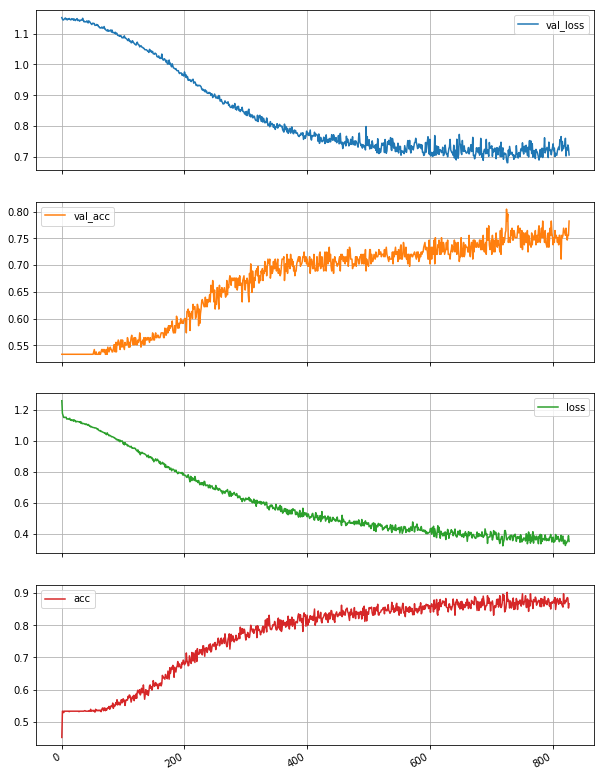

In [10]:
%matplotlib inline

# The history attribute from history object is a record of training loss values and metrics values at 
# successive epochs, as well as validation loss values and validation metrics values. It can be used to plot graphs
# which let us understand how good the training was performed over the epochs.


print(history.history)
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [11]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [12]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "amlangup")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50288686")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 18  Correct :82
Testing Accuracy: 82.0
